<a href="https://colab.research.google.com/github/Ankur099IIT/Natural-Language-Processing-Course-3-Deeplearning.ai/blob/main/Comparing_four_models_for_the_IMDB_reviews_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3YQJ5F/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3YQJ5F/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3YQJ5F/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [7]:
imdb # a dictionary

{'test': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [3]:
train_data, test_data = imdb['train'], imdb['test']



In [20]:
len(test_data)

25000

In [23]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())





In [24]:
len(testing_sentences)

25000

In [25]:
training_sentences[:5]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [26]:
training_labels[:5]

[0, 0, 0, 1, 1]

In [27]:
testing_sentences[:5]

["There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.",
 "A blackly comic tale of a down-trodden priest, Nazarin

In [28]:
testing_labels[:5]

[1, 1, 0, 0, 1]

In [30]:
# Converting list into numpy arrays because after tokeization, sequencing and padding it generated the numpy for training and testing_sentences

import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'
trunc_type = 'post'
max_length = 120

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)

training_padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type)

Model 1: Flatten

In [35]:
import tensorflow as tf

embedding_dim = 16
dense_dim = 6

model_flatten = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(dense_dim, activation = 'relu'),
                tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

model_flatten.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_flatten = model_flatten.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 6ms/step - loss: 0.4931 - accuracy: 0.7437 - val_loss: 0.3805 - val_accuracy: 0.8293
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2402 - accuracy: 0.9070 - val_loss: 0.4075 - val_accuracy: 0.8226
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0968 - accuracy: 0.9736 - val_loss: 0.5073 - val_accuracy: 0.8104
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0246 - accuracy: 0.9969 - val_loss: 0.5978 - val_accuracy: 0.8080
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0073 - accuracy: 0.9994 - val_loss: 0.6719 - val_accuracy: 0.8073
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.7379 - val_accuracy: 0.8096
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 9.2605e-04 - accuracy: 1.0000 - val_loss: 0.7883 - val_accuracy: 0.8091
Ep

In [37]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


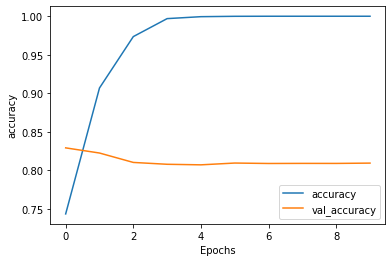

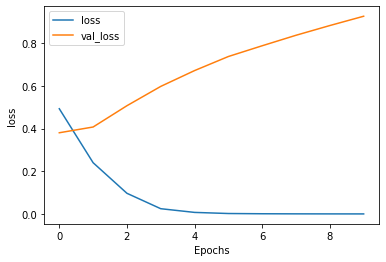

In [38]:
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

Model2: LSTM

In [40]:
lstm_dim = 32


model_lstm = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
             tf.keras.layers.Dense(dense_dim, activation = 'relu'),
             tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

model_lstm.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_lstm.summary()                    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [41]:
history_lstm = model_flatten.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0148e-04 - accuracy: 1.0000 - val_loss: 0.9718 - val_accuracy: 0.8082
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.7726e-04 - accuracy: 1.0000 - val_loss: 1.0538 - val_accuracy: 0.8042
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 5.2445e-05 - accuracy: 1.0000 - val_loss: 1.0878 - val_accuracy: 0.8060
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 2.4306e-05 - accuracy: 1.0000 - val_loss: 1.1217 - val_accuracy: 0.8059
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 1.5513e-05 - accuracy: 1.0000 - val_loss: 1.1535 - val_accuracy: 0.8061
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 1.0218e-05 - accuracy: 1.0000 - val_loss: 1.1893 - val_accuracy: 0.8053
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 6.6961e-06 - accuracy: 1.0000 - val_loss: 1.2244 

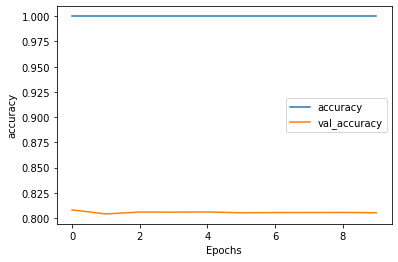

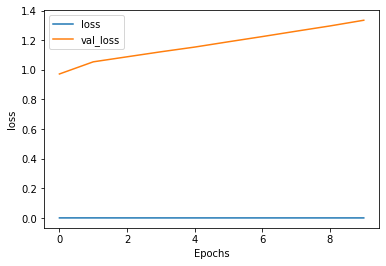

In [42]:
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

Model3: GRU

In [43]:
gru_dim = 32


model_gru = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
             tf.keras.layers.Dense(dense_dim, activation = 'relu'),
             tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

model_gru.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_gru.summary()                    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [44]:
history_gru = model_flatten.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 7ms/step - loss: 1.2501e-06 - accuracy: 1.0000 - val_loss: 1.3705 - val_accuracy: 0.8057
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 8.2220e-07 - accuracy: 1.0000 - val_loss: 1.4078 - val_accuracy: 0.8058
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 5.4203e-07 - accuracy: 1.0000 - val_loss: 1.4424 - val_accuracy: 0.8057
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 3.5949e-07 - accuracy: 1.0000 - val_loss: 1.4797 - val_accuracy: 0.8057
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 2.4105e-07 - accuracy: 1.0000 - val_loss: 1.5145 - val_accuracy: 0.8058
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 1.6210e-07 - accuracy: 1.0000 - val_loss: 1.5511 - val_accuracy: 0.8052
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1057e-07 - accuracy: 1.0000 - val_loss: 1.5857 

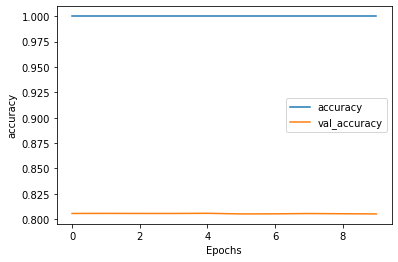

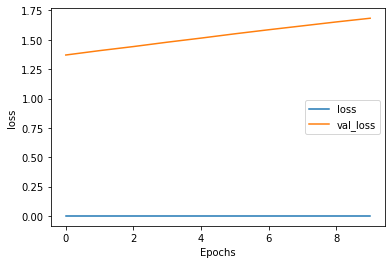

In [45]:
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

Model4: Convolution

In [46]:

filters = 128
kernel_size = 5

model_gru = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
             tf.keras.layers.Conv1D(filters = filters, kernel_size = kernel_size, activation = 'relu'),
             tf.keras.layers.GlobalAveragePooling1D(),
             tf.keras.layers.Dense(dense_dim, activation = 'relu'),
             tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

model_gru.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_gru.summary()   

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

In [47]:
history_convolution = model_flatten.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 2.7198e-08 - accuracy: 1.0000 - val_loss: 1.7159 - val_accuracy: 0.8050
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 1.9774e-08 - accuracy: 1.0000 - val_loss: 1.7456 - val_accuracy: 0.8046
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.4709e-08 - accuracy: 1.0000 - val_loss: 1.7744 - val_accuracy: 0.8047
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.1145e-08 - accuracy: 1.0000 - val_loss: 1.7999 - val_accuracy: 0.8046
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 8.7518e-09 - accuracy: 1.0000 - val_loss: 1.8264 - val_accuracy: 0.8042
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 7.1066e-09 - accuracy: 1.0000 - val_loss: 1.8499 - val_accuracy: 0.8042
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 5.9518e-09 - accuracy: 1.0000 - val_loss: 1.874

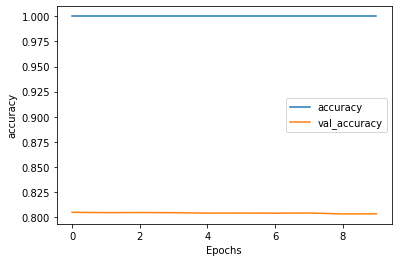

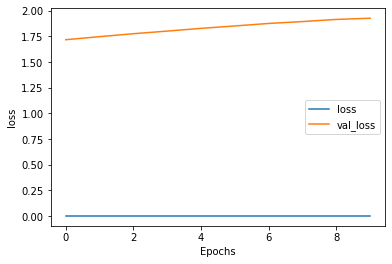

In [48]:
plot_graphs(history_convolution, 'accuracy')
plot_graphs(history_convolution, 'loss')